In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv("musk_csv.csv")
data.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [20]:
data.drop(["ID", "molecule_name" ,"conformation_name"],axis=1,inplace=True)
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,...,86,99,-14,-31,106,171,-44,-116,117,0


In [21]:
X = data.drop(["class"],axis=1)
Y = data["class"]

In [22]:
X = np.array(X)
Y= np.array(Y)
print(X.shape)
print(Y.shape)
x_train,x_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2)
x_train.shape,x_test.shape

(6598, 166)
(6598,)


((5278, 166), (1320, 166))

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(166,activation='sigmoid'))
model.add(tf.keras.layers.Dense(300, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8,validation_split=0.2, shuffle=True)


Train on 4222 samples, validate on 1056 samples
Epoch 1/8
4222/4222 [==============================] - 2s 398us/sample - loss: 0.3966 - accuracy: 0.8423 - val_loss: 0.2649 - val_accuracy: 0.9148
Epoch 2/8
4222/4222 [==============================] - 0s 112us/sample - loss: 0.3063 - accuracy: 0.8740 - val_loss: 0.2673 - val_accuracy: 0.9261
Epoch 3/8
4222/4222 [==============================] - 0s 118us/sample - loss: 0.2623 - accuracy: 0.8955 - val_loss: 0.2008 - val_accuracy: 0.9394
Epoch 4/8
4222/4222 [==============================] - 1s 125us/sample - loss: 0.2342 - accuracy: 0.9162 - val_loss: 0.1952 - val_accuracy: 0.9375
Epoch 5/8
4222/4222 [==============================] - 0s 118us/sample - loss: 0.2245 - accuracy: 0.9183 - val_loss: 0.1778 - val_accuracy: 0.9328
Epoch 6/8
4222/4222 [==============================] - 0s 108us/sample - loss: 0.2105 - accuracy: 0.9228 - val_loss: 0.1757 - val_accuracy: 0.9366
Epoch 7/8
4222/4222 [==============================] - 0s 108us/sample

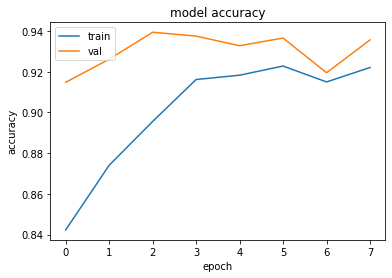

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

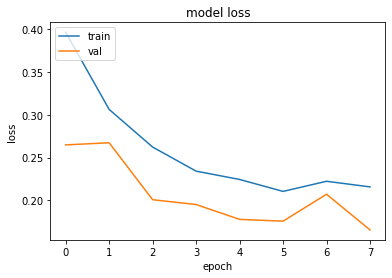

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
model.evaluate(x_test,y_test,verbose=2)

1320/1 - 0s - loss: 0.1532 - accuracy: 0.9174


[0.19719540106527733, 0.91742426]

In [28]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(x_train, y_train, epochs=500,validation_split=0.2, shuffle=True)

Train on 4222 samples, validate on 1056 samples
Epoch 1/500
4222/4222 [==============================] - 3s 657us/sample - loss: 0.0927 - accuracy: 0.9690 - val_loss: 0.1078 - val_accuracy: 0.9678
Epoch 2/500
4222/4222 [==============================] - 0s 104us/sample - loss: 0.0973 - accuracy: 0.9697 - val_loss: 0.1028 - val_accuracy: 0.9697
Epoch 3/500
4222/4222 [==============================] - 0s 104us/sample - loss: 0.0862 - accuracy: 0.9716 - val_loss: 0.0978 - val_accuracy: 0.9612
Epoch 4/500
4222/4222 [==============================] - 0s 107us/sample - loss: 0.0844 - accuracy: 0.9716 - val_loss: 0.0876 - val_accuracy: 0.9706
Epoch 5/500
4222/4222 [==============================] - 0s 117us/sample - loss: 0.0758 - accuracy: 0.9766 - val_loss: 0.0772 - val_accuracy: 0.9801
Epoch 6/500
4222/4222 [==============================] - 0s 112us/sample - loss: 0.0639 - accuracy: 0.9787 - val_loss: 0.0699 - val_accuracy: 0.9811
Epoch 7/500
4222/4222 [==============================] - 1

4222/4222 [==============================] - 0s 107us/sample - loss: 0.0598 - accuracy: 0.9751 - val_loss: 0.0916 - val_accuracy: 0.9640
Epoch 110/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0664 - accuracy: 0.9723 - val_loss: 0.0768 - val_accuracy: 0.9678
Epoch 111/500
4222/4222 [==============================] - 0s 106us/sample - loss: 0.0593 - accuracy: 0.9758 - val_loss: 0.0732 - val_accuracy: 0.9697
Epoch 112/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.0589 - accuracy: 0.9789 - val_loss: 0.0925 - val_accuracy: 0.9669
Epoch 113/500
4222/4222 [==============================] - 0s 107us/sample - loss: 0.0558 - accuracy: 0.9775 - val_loss: 0.0957 - val_accuracy: 0.9640
Epoch 114/500
4222/4222 [==============================] - 0s 107us/sample - loss: 0.0658 - accuracy: 0.9739 - val_loss: 0.0885 - val_accuracy: 0.9612
Epoch 115/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0609 - accuracy: 0.9780

4222/4222 [==============================] - 0s 107us/sample - loss: 0.0611 - accuracy: 0.9780 - val_loss: 0.0976 - val_accuracy: 0.9697
Epoch 218/500
4222/4222 [==============================] - 0s 106us/sample - loss: 0.0729 - accuracy: 0.9754 - val_loss: 0.0739 - val_accuracy: 0.9763
Epoch 219/500
4222/4222 [==============================] - 0s 106us/sample - loss: 0.0587 - accuracy: 0.9801 - val_loss: 0.0812 - val_accuracy: 0.9697
Epoch 220/500
4222/4222 [==============================] - 0s 106us/sample - loss: 0.0606 - accuracy: 0.9787 - val_loss: 0.0815 - val_accuracy: 0.9735
Epoch 221/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0745 - val_accuracy: 0.9763
Epoch 222/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.0696 - val_accuracy: 0.9773
Epoch 223/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0468 - accuracy: 0.9856

4222/4222 [==============================] - 0s 106us/sample - loss: 0.0817 - accuracy: 0.9739 - val_loss: 0.1017 - val_accuracy: 0.9678
Epoch 326/500
4222/4222 [==============================] - 0s 107us/sample - loss: 0.0862 - accuracy: 0.9687 - val_loss: 0.0987 - val_accuracy: 0.9716
Epoch 327/500
4222/4222 [==============================] - 0s 104us/sample - loss: 0.0746 - accuracy: 0.9801 - val_loss: 0.0913 - val_accuracy: 0.9735
Epoch 328/500
4222/4222 [==============================] - 0s 106us/sample - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.0982 - val_accuracy: 0.9716
Epoch 329/500
4222/4222 [==============================] - 0s 108us/sample - loss: 0.0773 - accuracy: 0.9768 - val_loss: 0.0930 - val_accuracy: 0.9716
Epoch 330/500
4222/4222 [==============================] - 0s 105us/sample - loss: 0.0607 - accuracy: 0.9815 - val_loss: 0.0790 - val_accuracy: 0.9792
Epoch 331/500
4222/4222 [==============================] - 0s 109us/sample - loss: 0.0723 - accuracy: 0.9749

4222/4222 [==============================] - 0s 115us/sample - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0896 - val_accuracy: 0.9754
Epoch 434/500
4222/4222 [==============================] - 0s 115us/sample - loss: 0.0413 - accuracy: 0.9827 - val_loss: 0.0761 - val_accuracy: 0.9706
Epoch 435/500
4222/4222 [==============================] - 0s 115us/sample - loss: 0.0396 - accuracy: 0.9846 - val_loss: 0.0798 - val_accuracy: 0.9697
Epoch 436/500
4222/4222 [==============================] - 0s 115us/sample - loss: 0.0388 - accuracy: 0.9853 - val_loss: 0.0818 - val_accuracy: 0.9640
Epoch 437/500
4222/4222 [==============================] - 0s 115us/sample - loss: 0.0507 - accuracy: 0.9796 - val_loss: 0.1036 - val_accuracy: 0.9621
Epoch 438/500
4222/4222 [==============================] - 0s 114us/sample - loss: 0.0506 - accuracy: 0.9815 - val_loss: 0.1108 - val_accuracy: 0.9678
Epoch 439/500
4222/4222 [==============================] - 0s 116us/sample - loss: 0.0473 - accuracy: 0.9853

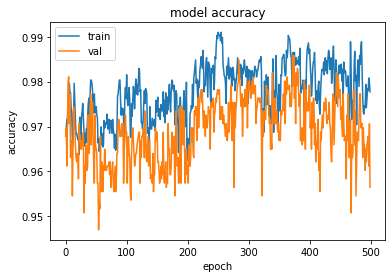

In [29]:
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

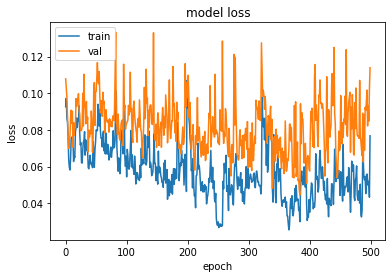

In [30]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

In [2]:
#model.evaluate(x_test,y_test,verbose=2)

NameError: name 'model' is not defined

In [28]:
model.save("MuskClassification.h5")

In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [56]:
yhat_probs = model.predict(x_test, verbose=0)

yhat_classes = model.predict_classes(x_test, verbose=0)

In [57]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [58]:
precision = precision_score(y_test, yhat_classes)
precision

0.8503401360544217

In [59]:
recall = recall_score(y_test, yhat_classes)
recall

0.589622641509434

In [60]:
f1 = f1_score(y_test, yhat_classes)
f1

0.6963788300835655

In [61]:
accuracy = accuracy_score(y_test, yhat_classes)
accuracy

0.9174242424242425